<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Building and Training a Feedforward Neural Network for Language Modeling**

Estimated time needed: **60** minutes

This project explores the use of Feedforward Neural Networks (FNNs) in language modeling. The primary objective is to build a neural network that learns word relationships and generates meaningful text sequences. The implementation is done using PyTorch, covering key aspects of Natural Language Processing (NLP), such as:
* Tokenization & Indexing: Converting text into numerical representations.
* Embedding Layers: Mapping words to dense vector representations for efficient learning.
* Context-Target Pair Generation (N-grams): Structuring training data for sequence prediction.
* Multi-Class Neural Network: Designing a model to predict the next word in a sequence.

The training process includes optimizing the model with loss functions and backpropagation techniques to improve accuracy and coherence in text generation. By the end of the project, you will have a working FNN-based language model capable of generating text sequences.
<div style="text-align:center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0WSVEN/song%20%281%29.png" alt="Image Description">
</div>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-required-libraries">Installing required libraries</a></li>
            <li><a href="#Importing-required-libraries">Importing required libraries</a></li>
            <li><a href="#Defining-helper-functions">Defining helper functions</a></li>
        </ol>
    </li>
    <li>
       <a href="#Feedforward-Neural-Networks-(FNNs)-for-language-models">Feedforward Neural Networks (FNNs) for language models</a></li>
        <ol>
            <li><a href="#Tokenization-for-FNN">Tokenization for FNN</a></li>
            <li><a href="#Indexing">Indexing</a></li>
            <li><a href="#Embedding-layers">Embedding layers</a></li>
        </ol>
</li>
    <li><a href="#Generating-context-target-pairs-(n-grams)">Generating context-target pairs (n-grams)</a></li>
    <ol>
        <li><a href="#Batch-function">Batch function</a></li>
        <li><a href="#Multi-class-neural-network">Multi-class neural network</a></li>
    </ol>
    <li><a href="#Training">Training</a></li>
    </li>
    <li><a href="#Exercises">Exercises</a></li>
    </li>
</ol>


---


# Objectives

After completing this lab, you will be able to:

 - Implement a feedforward neural network using the PyTorch framework, including embedding layers, for language modeling tasks.
 - Fine-tune the output layer of the neural network for optimal performance in text generation.
 - Apply various training strategies and fundamental Natural Language Processing (NLP) techniques, such as tokenization and sequence analysis, to improve text generation.


---


# Setup


For this lab, you will use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries

All the required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries using the code cell below.

<h2 style="color:red;">After installing the libraries below please RESTART THE KERNEL and run all cells.</h2>


In [2]:
%%capture
!pip install nltk
!pip install scikit-learn
!pip install torch==2.6.0
!pip install torchtext==0.17.2
!pip install matplotlib
!pip install pandas
!pip install numpy==1.26.4

__Note__: The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing required libraries

_It is recommended that you import all required libraries in one place (here):_


In [1]:
%%capture
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
import time
from collections import OrderedDict

import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import string
import time
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
%capture

---


## Feedforward Neural Networks (FNNs) for language models

FNNs, or Multi-Layer Perceptrons, serve as the foundational components for comprehending neural networks in natural language processing (NLP). In NLP tasks, FNNs process textual data by transforming it into numerical vectors known as embeddings. Subsequently, these embeddings are input to the network to predict language facets, such as the upcoming word in a sentence or the sentiment of a text.

Let's consider the following song lyrics for our analysis.


In [2]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

 ### Tokenization for FNN


 This PyTorch function is used to obtain a tokenizer for text.


In [3]:
tokenizer = get_tokenizer("basic_english")
tokens=tokenizer(song)

In [4]:
def preprocess_string(s):
    """
    Preprocesses a given string by performing the following steps:
    
    1. Removes all non-word characters (excluding letters and numbers).
    2. Removes all whitespace characters.
    3. Removes all numeric digits.

    Parameters:
    s (str): The input string to be cleaned.

    Returns:
    str: The processed string with only alphabetic characters, no spaces, and no digits.
    """

    # Remove all non-word characters (everything except letters and numbers)
    # \w matches any word character (letters, numbers, and underscores)
    # \s matches any whitespace characters
    # ^ inside [] negates the selection, so [^\w\s] matches anything that's NOT a word character or whitespace.
    s = re.sub(r"[^\w\s]", '', s)

    # Remove all whitespace characters (spaces, tabs, newlines)
    # \s+ matches one or more whitespace characters.
    s = re.sub(r"\s+", '', s)

    # Remove all digits (0-9)
    # \d matches any digit character.
    s = re.sub(r"\d", '', s)

    return s

In [5]:
def preprocess(words):
    """
    Preprocesses a given text by tokenizing it, cleaning individual words, and 
    converting them to lowercase while removing empty or punctuation tokens.

    Steps:
    1. Tokenization: Splits the input text into individual word tokens.
    2. Cleaning: Applies `preprocess_string()` to remove non-word characters, 
       spaces, and digits from each token.
    3. Normalization: Converts all tokens to lowercase.
    4. Filtering: Removes empty strings and punctuation tokens.

    Parameters:
    words (str): The input text to be tokenized and preprocessed.

    Returns:
    list: A list of cleaned, lowercase tokens.
    """

    # Tokenize the input text into words
    tokens = word_tokenize(words)

    # Apply preprocessing to each token (removes unwanted characters)
    tokens = [preprocess_string(w) for w in tokens]

    # Convert tokens to lowercase and remove empty strings or punctuation
    return [w.lower() for w in tokens if len(w) != 0 and w not in string.punctuation]

# Example usage:
tokens = preprocess(song)  # Preprocess the text in 'song'

### Indexing

TorchText provides tools to tokenize text into individual words (tokens) and build a vocabulary, which maps tokens to unique integer indexes. This is a crucial step in preparing text data for  machine learning models that require numerical input.


In [6]:
def tokenizetext(song):
    """
    Tokenizes the input text (song) and builds a vocabulary from the tokens.

    Steps:
    1. Tokenization: The function splits the input text into words and applies 
       a tokenizer function to each word.
    2. Vocabulary Building: Constructs a vocabulary from the tokenized words,
       including a special "<unk>" token to handle out-of-vocabulary words.
    3. Default Indexing: Sets the default index for unknown words, ensuring 
       that any unseen tokens are mapped to "<unk>".

    Parameters:
    song (str): The input text (song lyrics) to be tokenized and processed.

    Returns:
    vocab (Vocab): A vocabulary object mapping tokens to their corresponding indices.
    """

    # Tokenize the text
    # Split the input text into words and apply the tokenizer function to each word.
    # The 'map' function ensures that each word is tokenized properly.
    tokenized_song = map(tokenizer, song.split())

    # Build vocabulary from tokenized text
    # The function `build_vocab_from_iterator` constructs a vocabulary by iterating 
    # over the tokenized words. The special token "<unk>" is added to handle words 
    # that are not present in the vocabulary.
    vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])

    # Set the default index for unknown words
    # The default index is set to the index of "<unk>" so that any word not found 
    # in the vocabulary is mapped to this token, preventing errors during lookup.
    vocab.set_default_index(vocab["<unk>"])

    return vocab


Convert the tokens to indices by applying the function as shown here:


In [7]:
vocab=tokenizetext(song)
vocab(tokens[0:10])

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

In [8]:
tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']



Write a text function that converts raw text into indexes.


In [9]:
text_pipeline = lambda x: vocab(tokenizer(x))
text_pipeline(song)[0:10]

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]


Find the word corresponding to an index using the```get_itos()```method. The result is a list where the index of the list corresponds to a word.


In [10]:
index_to_token = vocab.get_itos()
index_to_token[58]

'are'

## Embedding layers

An embedding layer is a crucial element in natural language processing (NLP) and neural networks designed for sequential data. It serves to convert categorical variables, like words or discrete indexes representing tokens, into continuous vectors. This transformation facilitates training and enables the network to learn meaningful relationships among words.

Let's consider a simple example involving a vocabulary of words 
- **Vocabulary**: {apple, banana, orange, pear}

Each word in your vocabulary has a unique index assigned to it: 
- **Indices**: {0, 1, 2, 3}

When using an embedding layer, you will initialize random continuous vectors for each index. For instance, the embedding vectors might look like:

- Vector for index 0 (apple): [0.2, 0.8]
- Vector for index 1 (banana): [0.6, -0.5]
- Vector for index 2 (orange): [-0.3, 0.7]
- Vector for index 3 (pear): [0.1, 0.4]
In PyTorch, you can create an embedding layer.


In [11]:
def genembedding(vocab):
    """
    Generates an embedding layer for the given vocabulary.

    The embedding layer transforms words into dense vector representations, 
    allowing the model to learn semantic relationships between words.

    Parameters:
    vocab (Vocab): The vocabulary object containing unique words and their indices.

    Returns:
    nn.Embedding: A PyTorch embedding layer with a specified embedding dimension.
    """

    # Define the embedding dimension (size of word vectors)
    embedding_dim = 20  # Each word will be represented as a 20-dimensional vector

    # Get the vocabulary size (number of unique words in the vocabulary)
    vocab_size = len(vocab)

    # Create an embedding layer
    # The nn.Embedding module maps word indices to dense vector representations.
    # It takes vocab_size as the number of words and embedding_dim as the vector size.
    embeddings = nn.Embedding(vocab_size, embedding_dim)

    return embeddings


**Embeddings**: Obtain the embedding for the first word with index 0 or 1. Don't forget that you have to convert the input into a tensor. The embeddings are initially initialized randomly, but as the model undergoes training, words with similar meanings gradually come to cluster closer together


In [12]:
embeddings=genembedding(vocab)
for n in range(2): 
    embedding=embeddings(torch.tensor(n))
    print("word",index_to_token[n])
    print("index",n)
    print( "embedding", embedding)
    print("embedding shape", embedding.shape)

word <unk>
index 0
embedding tensor([ 1.2683, -0.3727,  0.9572,  0.5323, -0.8599,  1.1443, -0.5074, -0.5281,
        -1.5061, -0.5367, -0.7770, -0.5044, -1.4626,  0.1475, -0.5747,  1.6194,
        -0.4607, -0.4354, -0.1334, -0.1149], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
word gonna
index 1
embedding tensor([ 0.5721,  2.7836,  0.3317,  1.6060,  0.2067, -2.4573, -1.5583,  1.2187,
        -1.2029, -1.3323, -0.2781, -0.0988, -0.0082,  0.2548,  0.7440,  0.8134,
        -0.5868, -1.0955, -0.2563,  1.7605], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])


These vectors will serve as inputs for the next layer.


### Generating context-target pairs (n-grams)

Organize words within a variable-size context using the following approach: Each word is denoted by 'i'. 
To establish the context, simply subtract 'j'. The size of the context is determined by the value of``CONTEXT_SIZE``.


In [13]:
# Define the context size for generating n-grams
CONTEXT_SIZE = 2  # The number of previous words used to predict the next word

def genngrams(tokens):
    """
    Generates n-grams from a list of tokens, where each n-gram consists of a 
    context (previous words) and a target (next word).

    The function constructs a list of tuples where:
    - The first element is a list of `CONTEXT_SIZE` previous words.
    - The second element is the target word that follows the context.

    Parameters:
    tokens (list): A list of preprocessed word tokens.

    Returns:
    list: A list of tuples representing n-grams.
          Each tuple contains (context_words, target_word).
    """

    # Generate n-grams
    # Iterate through the tokens starting from index CONTEXT_SIZE to the end
    # For each token at position 'i', extract the previous CONTEXT_SIZE words as context
    ngrams = [
        (
            [tokens[i - j - 1] for j in range(CONTEXT_SIZE)],  # Context words (previous words)
            tokens[i]  # Target word (the word to predict)
        )
        for i in range(CONTEXT_SIZE, len(tokens))
    ]

    return ngrams


Output the first element, which results in a tuple. The initial element represents the context, and the index indicates the following word.


In [14]:
ngrams=genngrams(tokens)
context, target=ngrams[0]
print("context",context,"target",target)
print("context index",vocab(context),"target index",vocab([target]))

context ['are', 'we'] target no
context index [58, 21] target index [70]


In this context, there are multiple words. Aggregate the embeddings of each of these words and then adjust the input size of the subsequent layer accordingly. Then, create the next layer.


In [15]:
embedding_dim=20
linear = nn.Linear(embedding_dim*CONTEXT_SIZE,128)


You have the two embeddings.


In [16]:
embeddings=genembedding(vocab)
my_embeddings=embeddings(torch.tensor(vocab(context)))
my_embeddings.shape

torch.Size([2, 20])

Reshape the embeddings.


In [17]:
my_embeddings=my_embeddings.reshape(1,-1)
my_embeddings.shape

torch.Size([1, 40])


They can now be used as inputs in the next layer.


In [18]:
linear(my_embeddings)

tensor([[ 0.2766,  0.6434,  0.5361,  0.3067, -0.7996,  0.5296,  0.6984, -0.9163,
         -0.7426,  0.0386,  0.5753, -0.2125,  0.4267,  0.1868,  0.4068,  1.0580,
          0.2799,  0.3575, -0.0505, -0.3676, -0.3311,  0.7954, -0.6405,  0.5102,
          0.0763, -1.6924,  0.0517, -0.3110, -0.2180, -0.0853,  0.6728, -0.3921,
          0.3152, -1.0239,  0.5549, -1.4302,  0.2180, -0.1177, -0.0024, -0.7597,
         -0.3429, -1.4291, -0.3123,  0.4089, -0.6381,  0.0188, -0.5585, -0.0077,
          0.9643, -0.7312,  0.1072, -1.0271,  0.1098,  0.0270, -0.4319,  1.3781,
         -0.7590,  1.4013,  0.2515,  0.2388,  0.5960, -1.6002, -0.1245, -0.0123,
         -0.7252,  0.9880, -0.5515, -0.1125,  0.6529,  0.2118, -0.0867, -0.8486,
          0.4601, -1.2270,  0.7230, -0.1766, -0.4415, -0.6316, -0.4050,  0.2123,
          0.2891, -0.5247,  1.8502, -0.1067,  0.5826, -0.7529,  0.0932, -0.5068,
          0.7345, -0.0763,  0.2817, -0.2968, -0.4369,  0.4231,  0.7508,  0.8382,
         -0.8554, -0.3689, -

## Batch function

Create a Batch function to interface with the data loader. Several adjustments are necessary to handle words that are part of a context in one batch and a predicted word in the following batch.


In [19]:
from torch.utils.data import DataLoader  # Importing DataLoader for batch processing
import torch  # Importing PyTorch

# Set the device to GPU if available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
CONTEXT_SIZE = 3   # Number of previous words used as context for prediction
BATCH_SIZE = 10    # Number of samples per training batch
EMBEDDING_DIM = 10 # Dimension of word embeddings

def collate_batch(batch):
    """
    Processes a batch of text data into input (context) and output (target) tensors
    for training a language model.

    The function extracts:
    - `context`: A list of word indices representing the context words for each target word.
    - `target`: A list of word indices representing the target word to predict.

    Parameters:
    batch (list): A list of tokenized words (strings).

    Returns:
    tuple: Two PyTorch tensors: (context_tensor, target_tensor)
           - context_tensor: Tensor of shape (batch_size - CONTEXT_SIZE, CONTEXT_SIZE),
             containing the word indices of context words.
           - target_tensor: Tensor of shape (batch_size - CONTEXT_SIZE,),
             containing the word indices of target words.
    """

    batch_size = len(batch)  # Get the size of the batch
    context, target = [], [] # Initialize lists for context and target words

    # Loop through the batch, ensuring enough previous words exist for context
    for i in range(CONTEXT_SIZE, batch_size):
        # Convert the target word to its index using the vocabulary
        target.append(vocab([batch[i]]))

        # Convert the previous CONTEXT_SIZE words to indices using the vocabulary
        context.append(vocab([batch[i - j - 1] for j in range(CONTEXT_SIZE)]))

    # Convert lists to PyTorch tensors and move them to the appropriate device (CPU/GPU)
    return torch.tensor(context).to(device), torch.tensor(target).to(device).reshape(-1)


Similarly, it's important to highlight that the size of the last batch could deviate from that of the earlier batches. To tackle this, the approach involves adjusting the final batch to conform to the specified batch size, ensuring it becomes a multiple of the predetermined size. When necessary, you'll employ padding techniques to achieve this harmonization. One approach you'll use is appending the beginning of the song to the end of the batch.


In [20]:
Padding=BATCH_SIZE-len(tokens)%BATCH_SIZE
tokens_pad=tokens+tokens[0:Padding]


Create the`DataLoader`.


In [21]:
dataloader = DataLoader(
     tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)

## Multi-class neural network

You have developed a PyTorch class for a multi-class neural network. The network's output is the probability of the next word within a given context. Therefore, the number of classes corresponds to the count of distinct words. The initial layer consists of embeddings, and in addition to the final layer, an extra hidden layer is incorporated.


In [22]:
class NGramLanguageModeler(nn.Module):
    """
    A neural network-based n-gram language model that predicts the next word 
    given a sequence of context words.

    This model consists of:
    - An embedding layer that converts word indices into dense vector representations.
    - A fully connected hidden layer with ReLU activation.
    - An output layer that predicts the probability distribution over the vocabulary.

    Parameters:
    vocab_size (int): The number of unique words in the vocabulary.
    embedding_dim (int): The size of the word embeddings (vector representation of words).
    context_size (int): The number of previous words used as context to predict the next word.
    """

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()

        # Store context size and embedding dimension
        self.context_size = context_size
        self.embedding_dim = embedding_dim

        # Embedding layer: Maps word indices to dense vectors
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # Fully connected hidden layer: Maps the concatenated embeddings to a 128-dimensional space
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)

        # Output layer: Maps the hidden layer output to vocabulary size (probability distribution over words)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        """
        Forward pass of the model.

        Parameters:
        inputs (Tensor): A tensor of shape (batch_size, context_size) containing word indices.

        Returns:
        Tensor: A tensor of shape (batch_size, vocab_size) representing predicted probabilities for the next word.
        """

        # Convert input word indices into dense vectors using the embedding layer
        embeds = self.embeddings(inputs)  # Shape: (batch_size, context_size, embedding_dim)

        # Reshape the embeddings into a single vector per input sample
        embeds = torch.reshape(embeds, (-1, self.context_size * self.embedding_dim))  
        # New shape: (batch_size, context_size * embedding_dim)

        # Apply first fully connected layer with ReLU activation
        out = F.relu(self.linear1(embeds))  # Shape: (batch_size, 128)

        # Apply second fully connected layer to generate vocabulary-size logits
        out = self.linear2(out)  # Shape: (batch_size, vocab_size)

        return out


Create a model.


In [23]:
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

Retrieve samples from the data loader object and input them into the neural network.


In [24]:
context, target=next(iter(dataloader))
print(context, target)
out=model(context)

tensor([[70, 58, 21],
        [74, 70, 58],
        [25, 74, 70],
        [69, 25, 74],
        [ 2, 69, 25],
        [20,  2, 69],
        [31, 20,  2]]) tensor([74, 25, 69,  2, 20, 31, 72])


While the model remains untrained, analyzing the output can provide us with a clearer understanding. In the output, the first dimension corresponds to the batch size, while the second dimension represents the probability associated with each class.


In [25]:
out.shape

torch.Size([7, 79])

Find the index with the highest probability.


In [26]:
predicted_index =torch.argmax(out,1)
predicted_index

tensor([ 3, 71, 14, 32,  8, 50,  3])

Find the corresponding token.


In [27]:
[index_to_token[i.item()] for i in  predicted_index]

['never', 'of', 'goodbye', 'too', 'a', 'shy', 'never']

Create a function that accomplishes the same task for the tokens.


In [28]:
def write_song(model, my_song, number_of_words=100):
    """
    Generates text using a trained n-gram language model.

    Given an initial text (`my_song`), the function generates additional words by 
    predicting the next word iteratively based on the trained model.

    Parameters:
    model (nn.Module): The trained n-gram language model.
    my_song (str): The initial seed text to start generating words.
    number_of_words (int): The number of words to generate (default: 100).

    Returns:
    str: The generated song lyrics as a string.
    """

    # Get the mapping from index to word for decoding predictions
    index_to_token = vocab.get_itos()

    # Loop to generate the desired number of words
    for i in range(number_of_words):

        with torch.no_grad():  # Disable gradient computation for inference
            
            # Prepare the input context by extracting the last CONTEXT_SIZE words from tokens
            context = torch.tensor(
                vocab([tokens[i - j - 1] for j in range(CONTEXT_SIZE)])
            ).to(device)  # Move to CPU/GPU as required
            
            # Predict the next word by selecting the word with the highest probability
            word_idx = torch.argmax(model(context))  # Get index of the most likely next word
            
            # Append the predicted word to the generated text
            my_song += " " + index_to_token[word_idx.detach().item()]

    return my_song  # Return the generated lyrics


In [29]:
def pickrandomline(song):
    """
    Selects a random line from the given song text.

    This function splits the song into separate lines and randomly picks one of them.

    Parameters:
    song (str): The song lyrics as a multi-line string.

    Returns:
    str: A randomly selected line from the song.
    """
    
    # Split the song into individual lines
    lines = song.split("\n")  
    
    # Randomly select a line and remove leading/trailing whitespace
    selected_line = random.choice(lines).strip()
    
    return selected_line  # Return the randomly selected line

# Example usage:
selected_line = pickrandomline(song)  # Pick a random line from the song

# Generate a new song starting with the selected line
generated_song = write_song(model, selected_line)

# Print the generated lyrics
print(generated_song)


Never gonna tell a lie and hurt you on cry see never of goodbye too a shy never and it and love youre from shy and a make and youre of how other from on on love any youre shy other from a on cry see from on from from love on cry from from blind make play from on from from a both a on from from youre of a make and from from from love goodbye a on from understand of around other from a a feeling on on on cry a youre were from a from see and and understand a and from a love


## Training

Training a language model involves a multi-step process that leverages training and testing data to optimize model performance. In the realm of Natural Language Processing (NLP), this process often employs various metrics to gauge a model's accuracy, such as perplexity or accuracy on unseen data. However, in the context of your current exploration, you will embark on a slightly different journey. Instead of relying solely on conventional NLP metrics, the focus shifts to manual inspection of the results. 

You have the cross entropy loss between input logits and target:


In [30]:
criterion = torch.nn.CrossEntropyLoss()

You have developed a function dedicated to training the model using the supplied data loader. In addition to training the model, the function's output includes predictions for each epoch, spanning context for the next 100 words.


>**Note: Since the dataset used is relatively small and the model is trained for a limited number of epochs, the generated song may not always be fully coherent due to a restricted vocabulary. This example primarily serves to demonstrate the functionality of a feedforward neural network for language modeling.**


In [31]:
def train(dataloader, model,song,number_of_epochs=100, show=10):
    """
    Args:
        dataloader (DataLoader): DataLoader containing training data.
        model (nn.Module): Neural network model to be trained.
        number_of_epochs (int, optional): Number of epochs for training. Default is 100.
        show (int, optional): Interval for displaying progress. Default is 10.

    Returns:
        list: List containing loss values for each epoch.
    """

    MY_LOSS = []  # List to store loss values for each epoch

    # Iterate over the specified number of epochs
    for epoch in tqdm(range(number_of_epochs)):
        total_loss = 0  # Initialize total loss for the current epoch
        my_song = ""    # Initialize a string to store the generated song

        # Iterate over batches in the dataloader
        for context, target in dataloader:
            model.zero_grad()          # Zero the gradients to avoid accumulation
            predicted = model(context)  # Forward pass through the model to get predictions
            loss = criterion(predicted, target.reshape(-1))  # Calculate the loss
            total_loss += loss.item()   # Accumulate the loss

            loss.backward()    # Backpropagation to compute gradients
            optimizer.step()   # Update model parameters using the optimizer

        # Display progress and generate song at specified intervals
        if epoch % show == 0:
            selected_line=pickrandomline(song)
            my_song += write_song(model, selected_line)    # Generate song using the model

            print("Generated Song:")
            print("\n")
            print(my_song)

        MY_LOSS.append(total_loss/len(dataloader))  # Append the total loss for the epoch to MY_LOSS list

    return MY_LOSS  # Return the list of  mean loss values for each epoch

The following list will be used to store the loss for each model.


In [32]:
my_loss_list=[]

This code segment initializes an n-gram language model with a context size of 2. The model, named `model_2`, is configured based on the provided vocabulary size, embedding dimension, and context size. The Stochastic Gradient Descent (SGD) optimizer is employed with a learning rate of 0.01 to manage model parameter updates. A learning rate scheduler, using a step-wise approach with a reduction factor of 0.1 per epoch, is set up to adapt the learning rate during the training process. These settings collectively establish the framework for training the n-gram language model with tailored optimization and learning rate adjustment.


In [33]:
# Define the context size for the n-gram model
CONTEXT_SIZE = 2

# Create an instance of the NGramLanguageModeler class with specified parameters
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define the optimizer for training the model, using stochastic gradient descent (SGD)
optimizer = optim.SGD(model_2.parameters(), lr=0.01)

# Set up a learning rate scheduler using StepLR to adjust the learning rate during training
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

Now, you will train the model.


In [34]:
my_loss=train(dataloader,model_2,song)

  2%|▏         | 2/100 [00:00<00:17,  5.50it/s]

Generated Song:


Gotta make you understand too hurt <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> it <unk> it <unk> aching <unk> you <unk> you you you <unk> <unk> <unk> any <unk> you <unk> you you <unk> <unk> <unk> you <unk> it <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> and hurt <unk> <unk> <unk> <unk> you been <unk> <unk> <unk> <unk> you <unk> you <unk> you <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> it any <unk> <unk> <unk> never <unk> <unk> no too <unk> we no you <unk> you <unk> <unk> <unk> <unk> whats <unk> you you you <unk>


 12%|█▏        | 12/100 [00:02<00:17,  5.02it/s]

Generated Song:


Never gonna give you up never <unk> <unk> <unk> <unk> <unk> <unk> never never <unk> <unk> <unk> you you never never never <unk> <unk> <unk> you <unk> never <unk> <unk> <unk> <unk> <unk> <unk> <unk> you never <unk> you you never <unk> you you <unk> you you <unk> <unk> <unk> <unk> you you never <unk> <unk> <unk> you you never <unk> <unk> <unk> you you you <unk> you never <unk> <unk> you you <unk> <unk> <unk> <unk> you you never <unk> <unk> you you never and <unk> you never <unk> you <unk> <unk> <unk> you you never <unk> <unk> you never never <unk> you <unk>


 22%|██▏       | 22/100 [00:04<00:15,  5.00it/s]

Generated Song:


Inside we both know whats been going on never never <unk> <unk> <unk> never <unk> never never never <unk> <unk> you never never never and never <unk> <unk> you <unk> never never <unk> never <unk> <unk> <unk> <unk> you never <unk> tell you never never never you <unk> tell you never <unk> <unk> <unk> tell you never <unk> <unk> <unk> tell you never never <unk> <unk> tell you and desert you never <unk> <unk> tell you never never <unk> <unk> tell you never <unk> <unk> tell you never and hurt you never <unk> you <unk> <unk> <unk> and you never <unk> <unk> you never never <unk> you <unk>


 32%|███▏      | 32/100 [00:06<00:13,  5.10it/s]

Generated Song:


Inside we both know whats been going on never never <unk> <unk> to never <unk> down never never <unk> desert you never never never and never <unk> <unk> you <unk> down never <unk> never <unk> <unk> to <unk> you and <unk> tell you never im feeling you <unk> tell you never never <unk> <unk> tell you never never <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you never never <unk> <unk> tell goodbye never <unk> <unk> tell you never and hurt you never <unk> you <unk> you <unk> to you never <unk> <unk> you never never <unk> you <unk>


 42%|████▏     | 42/100 [00:08<00:11,  5.03it/s]

Generated Song:


Never gonna give you up never never <unk> <unk> to <unk> <unk> down never never <unk> desert you and never never and never <unk> <unk> you <unk> down never <unk> never <unk> <unk> to <unk> you and <unk> tell you never im feeling you <unk> tell you down never <unk> <unk> tell you never never <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you down never <unk> <unk> tell goodbye never <unk> <unk> tell you to and hurt you never <unk> each down for <unk> to you never <unk> <unk> but never never <unk> to <unk>


 52%|█████▏    | 52/100 [00:10<00:09,  5.16it/s]

Generated Song:


Weve known each other for so long never never no <unk> to <unk> <unk> down never never <unk> desert you i never say and never never <unk> you <unk> down never we never <unk> other to <unk> you and <unk> tell you never im feeling you <unk> tell you down never <unk> <unk> tell you never know <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you down never <unk> <unk> tell goodbye never <unk> <unk> tell you to and hurt you never never each other for <unk> to we never been <unk> but youre never shy to say


 62%|██████▏   | 62/100 [00:12<00:07,  4.75it/s]

Generated Song:


Never gonna run around and desert you never never no <unk> to feeling <unk> down never never <unk> were you i a say and been never <unk> you <unk> down never we never <unk> other to <unk> to and <unk> tell you how im feeling you <unk> tell you understand never <unk> <unk> tell you never know <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you to and hurt you never known each other for i to we never been <unk> but youre never shy to say


 71%|███████   | 71/100 [00:14<00:05,  5.05it/s]

Generated Song:


Gotta make you understand never never no strangers to love <unk> down never never <unk> were you i a full and been been <unk> you <unk> down never we never <unk> other to <unk> to and <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you never know <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you to and hurt you never known each other for i to we never been aching but youre too shy to say


 82%|████████▏ | 82/100 [00:16<00:03,  5.20it/s]

Generated Song:


Never gonna give you up never never no strangers to love <unk> down never game and were you i a full commitments been been <unk> you <unk> down never we from <unk> other guy i to and <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you down know <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for i to your never been aching but youre too shy to say


 91%|█████████ | 91/100 [00:18<00:02,  4.40it/s]

Generated Song:


Never gonna let you down never never no strangers to love <unk> know the game and were do i a full commitments been been <unk> you <unk> down never we from any other guy i to <unk> <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you never know <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for so to your never been aching but youre too shy to say


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


Save the model.


In [35]:
save_path = '2gram.pth'
torch.save(model_2.state_dict(), save_path)
my_loss_list.append(my_loss)

The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


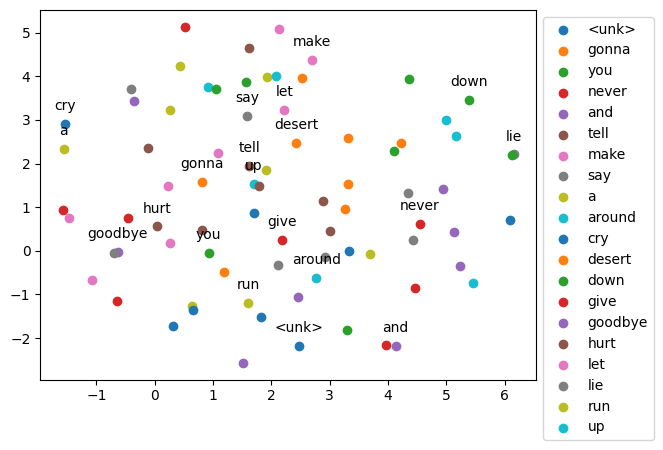

In [36]:
X = model_2.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [37]:
import numpy as np
print(np.__version__)

1.26.4


Repeat the process for a context of four.


In [38]:
CONTEXT_SIZE=4
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_4,song)

save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)

my_loss_list.append(my_loss)

  2%|▏         | 2/100 [00:00<00:20,  4.87it/s]

Generated Song:


Never gonna let you down play <unk> <unk> you <unk> <unk> <unk> <unk> you you <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> goodbye <unk> <unk> <unk> <unk> <unk> play you <unk> <unk> <unk> <unk> <unk> <unk> <unk> you you <unk> <unk> <unk> <unk> <unk> you you <unk> <unk> <unk> <unk> you you <unk> <unk> <unk> <unk> you you <unk> <unk> <unk> <unk> you you <unk> you <unk> <unk> <unk> <unk> you you <unk> <unk> <unk> <unk> you never <unk> <unk> <unk> you you <unk> <unk> you play <unk> you <unk> <unk> you you <unk> were <unk> were <unk> too <unk> shy <unk> <unk>


 12%|█▏        | 12/100 [00:02<00:17,  5.04it/s]

Generated Song:


Never gonna tell a lie and hurt you never <unk> <unk> <unk> <unk> <unk> <unk> <unk> you you <unk> <unk> you never <unk> <unk> <unk> you <unk> <unk> never <unk> <unk> <unk> <unk> <unk> never <unk> <unk> you <unk> <unk> <unk> <unk> you never <unk> <unk> <unk> <unk> <unk> you never never <unk> <unk> make you never never <unk> <unk> <unk> you never never <unk> <unk> tell you <unk> you you never <unk> <unk> make you never never <unk> <unk> <unk> you never <unk> <unk> tell you never <unk> <unk> you never never never <unk> <unk> you you <unk> <unk> <unk> tell never never <unk> you <unk> <unk>


 22%|██▏       | 22/100 [00:04<00:14,  5.25it/s]

Generated Song:


Never gonna run around and desert you never <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> you never <unk> <unk> <unk> tell <unk> never never <unk> <unk> tell you <unk> never <unk> <unk> you <unk> <unk> <unk> tell you down never <unk> <unk> <unk> <unk> you never never <unk> <unk> say you never never <unk> <unk> let you down never <unk> <unk> let you down you you never <unk> <unk> make you never never <unk> <unk> say you never <unk> <unk> tell you down never <unk> you never never you <unk> for you you <unk> <unk> <unk> tell never youre too you never <unk>


 32%|███▏      | 32/100 [00:06<00:12,  5.57it/s]

Generated Song:


Never gonna let you down never <unk> <unk> <unk> <unk> <unk> <unk> know say you <unk> were you never a <unk> <unk> tell <unk> thinking how <unk> <unk> im you other never <unk> guy you <unk> going <unk> tell you how im feeling <unk> <unk> <unk> you never never <unk> <unk> say you never never <unk> <unk> let you down never <unk> <unk> let you down goodbye you never <unk> <unk> make you never never <unk> <unk> say goodbye never <unk> <unk> tell you how im <unk> you never known each other for im you never <unk> <unk> <unk> but youre too shy how <unk>


 42%|████▏     | 42/100 [00:08<00:11,  5.20it/s]

Generated Song:


Never gonna let you down never <unk> <unk> <unk> to <unk> <unk> know say you <unk> were you never a full <unk> what im thinking how <unk> <unk> im feeling other never other guy feeling to going <unk> tell you how im feeling <unk> <unk> say you never never <unk> <unk> say you never never <unk> <unk> let you down never <unk> <unk> let you down goodbye you never <unk> <unk> make you never never <unk> <unk> say goodbye never <unk> <unk> tell you how im <unk> you never known each other for im <unk> never <unk> <unk> <unk> but youre too shy to <unk>


 52%|█████▏    | 52/100 [00:10<00:09,  5.29it/s]

Generated Song:


Your hearts been aching but youre too shy to say it never <unk> <unk> strangers to love you know say you <unk> were you never a full commitments what im thinking how <unk> <unk> im feeling from never other guy i to going <unk> tell you how im feeling <unk> <unk> say you how never <unk> <unk> say you down never <unk> <unk> let you down never <unk> <unk> let you down goodbye you never <unk> <unk> make you how never <unk> <unk> say goodbye never <unk> <unk> tell you lie im <unk> you never known each other for so <unk> never been been <unk> but youre too shy to say


 62%|██████▏   | 62/100 [00:11<00:07,  5.41it/s]

Generated Song:


Never gonna say goodbye never are no strangers to love you know the you <unk> were you never a full commitments what im thinking how <unk> <unk> im feeling from any other guy i to going <unk> tell you how im feeling <unk> <unk> say you cry never <unk> <unk> say you down never <unk> <unk> let you down never <unk> <unk> let you how goodbye you never <unk> <unk> make you cry never <unk> <unk> say goodbye never <unk> <unk> tell you lie im <unk> you never known each other for so <unk> never been been aching but youre too shy to say


 72%|███████▏  | 72/100 [00:13<00:05,  5.32it/s]

Generated Song:


Never gonna run around and desert you never are no strangers to love you know the rules <unk> were you never a full commitments what im thinking how <unk> <unk> never this from any other guy i to going <unk> tell you how im feeling <unk> <unk> say you cry never <unk> <unk> give you down never <unk> <unk> let you down never <unk> <unk> let you how goodbye you never <unk> <unk> make you cry never <unk> <unk> say goodbye never <unk> <unk> tell you lie im <unk> you never known each other for so long never been been aching but youre too shy to say


 81%|████████  | 81/100 [00:15<00:03,  4.80it/s]

Generated Song:


Never gonna say goodbye never are no strangers to love you know the rules <unk> were you never a full commitments what im thinking how <unk> <unk> never this from any other guy i to going <unk> tell you how im feeling <unk> <unk> say you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run you how goodbye you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell you lie im <unk> you never known each other for so long never been been aching but youre too shy to say


 91%|█████████ | 91/100 [00:17<00:01,  5.20it/s]

Generated Song:


Never gonna make you cry never are no strangers to love you know the rules <unk> were you never a full commitments what im thinking how <unk> <unk> never this from any other guy i to going <unk> tell you how im feeling <unk> <unk> say you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run you how goodbye you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell you lie im <unk> you never known each other for so long never been been aching but youre too shy to say


100%|██████████| 100/100 [00:19<00:00,  5.18it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2d using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


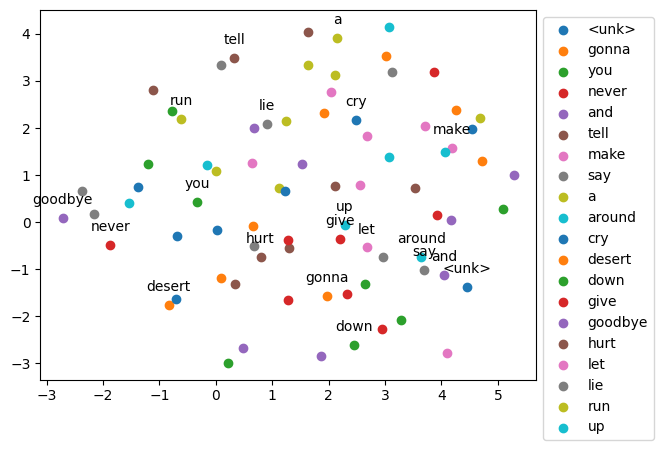

In [39]:
X = model_4.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Finally, for a context of eight.


In [40]:
CONTEXT_SIZE=8
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_8.parameters(), lr=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_8,song)

save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)

my_loss_list.append(my_loss)

  1%|          | 1/100 [00:00<00:19,  5.18it/s]

Generated Song:


You know the rules and so do I <unk> you you <unk> you <unk> game <unk> you cry you <unk> on blind you <unk> <unk> you on <unk> tell you on you <unk> run <unk> on on <unk> you tell <unk> you <unk> <unk> you <unk> <unk> <unk> you you im say <unk> <unk> you you <unk> <unk> <unk> <unk> <unk> you so you <unk> <unk> you you you <unk> <unk> <unk> you <unk> make you <unk> cry <unk> <unk> <unk> you <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> cry you <unk> you <unk> run thinking you so you were <unk> on you you you


 12%|█▏        | 12/100 [00:02<00:17,  5.13it/s]

Generated Song:


Never gonna let you down <unk> give im give you <unk> <unk> give the rules you <unk> <unk> <unk> <unk> make give you im thinking tell give make you you <unk> <unk> you guy i to tell give make you give im <unk> <unk> <unk> give you im never <unk> <unk> give you up never <unk> <unk> tell you im never <unk> <unk> give you im <unk> <unk> <unk> <unk> <unk> make you cry never <unk> <unk> give you im tell <unk> tell you lie never <unk> <unk> <unk> give im give you <unk> long make you give you <unk> <unk> too <unk> to say


 22%|██▏       | 22/100 [00:04<00:17,  4.41it/s]

Generated Song:


We know the game and were gonna play it <unk> im we strangers to so run give the rules to <unk> <unk> <unk> play make and you im thinking im im make me up to <unk> play guy i to tell give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> tell around up never <unk> <unk> run around and never <unk> <unk> run <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it you give you other <unk> too shy to say


 31%|███       | 31/100 [00:06<00:14,  4.78it/s]

Generated Song:


Never gonna let you down <unk> play we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me up to <unk> play guy i to tell give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> tell around up never <unk> <unk> run around and never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say give you other <unk> too shy to say


 41%|████      | 41/100 [00:08<00:14,  4.20it/s]

Generated Song:


Never gonna make you cry <unk> on we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to tell give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around and never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say make the other <unk> too shy to say


 52%|█████▏    | 52/100 [00:10<00:08,  5.64it/s]

Generated Song:


Never gonna run around and desert you <unk> on we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to tell give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around up never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say other the other <unk> too shy to say


 62%|██████▏   | 62/100 [00:12<00:07,  5.38it/s]

Generated Song:


Weve known each other for so long <unk> on we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to tell give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around up never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say other the other <unk> too shy to say


 71%|███████   | 71/100 [00:14<00:05,  5.24it/s]

Generated Song:


We know the game and were gonna play it <unk> on we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to to give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around up never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say other the other <unk> too shy to say


 82%|████████▏ | 82/100 [00:16<00:03,  5.56it/s]

Generated Song:


Never gonna give you up <unk> on we strangers to so long going the rules me on <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to to give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around up never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say other the other <unk> too shy to say


 92%|█████████▏| 92/100 [00:18<00:01,  5.26it/s]

Generated Song:


Never gonna give you up <unk> on we strangers to so long going the rules me for <unk> <unk> play it and you im thinking im feeling other me i to <unk> play guy i to to give make you lie im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> run around up never <unk> <unk> run tell make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> <unk> <unk> im we other for so long it say other the other <unk> too shy to say


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


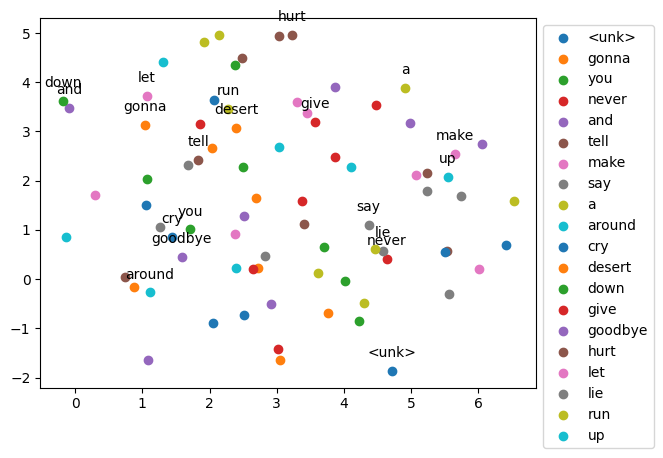

In [41]:
X = model_8.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

When considering the plotted loss for each model, a discernible trend emerges: an increase in context size correlates with a reduction in loss. While this specific approach lacks the inclusion of model validation or the utilization of conventional NLP evaluation metrics, the visual evidence substantiates its superior performance. 


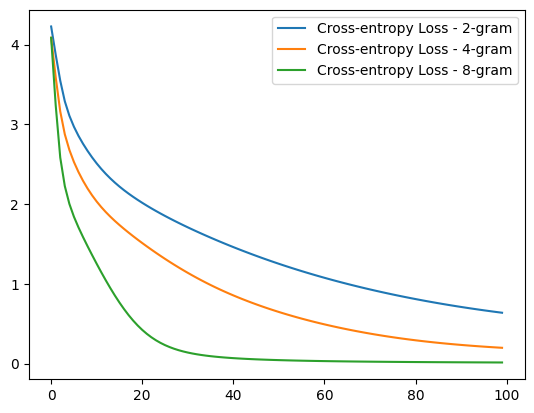

In [42]:
for (my_loss, model_name)in zip(my_loss_list,["2-gram","4-gram","8-gram"]):
    plt.plot(my_loss,label="Cross-entropy Loss - {}".format(model_name))
    plt.legend()

## Perplexity
Perplexity is a measurement used to evaluate the effectiveness of language models or probability models. It provides an indication of how well a model predicts a sample of data or the likelihood of an unseen event. Perplexity is commonly used in natural language processing tasks, such as machine translation, speech recognition, and language generation.

Perplexity is derived from the concept of cross-entropy loss, which measures the dissimilarity between predicted probabilities and actual probabilities. 

$$\text{Cross-Entropy Loss} = -\sum_{i=1}^{N} y_i \ln(p_i)$$
The cross-entropy loss is calculated by taking the negative sum of the products of the true labels $y_i$ and the logarithm of the predicted probabilities $p_i$ over $N$ classes.

Taking the exponential of the mean cross-entropy loss gives us the perplexity value.

$$\text{Perplexity} = e^{\frac{1}{N} \text{Cross-Entropy Loss}}$$


A lower perplexity value indicates that the model is more confident and accurate in predicting the data. Conversely, a higher perplexity suggests that the model is less certain and less accurate in its predictions.

Perplexity can be seen as an estimate of the average number of choices the model has for the next word or event in a sequence. A lower perplexity means that the model is more certain about the next word, while a higher perplexity means that there are more possible choices.


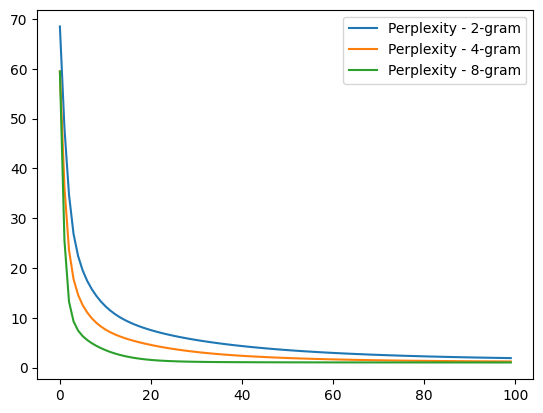

In [43]:
for (my_loss, model_name)in zip(my_loss_list,["2-gram","4-gram","8-gram"]):
    # Calculate perplexity using the loss
    perplexity = np.exp(my_loss)
    plt.plot(perplexity,label="Perplexity - {}".format(model_name))
    plt.legend()

# Exercises


### Exercise 1 - Source a collection of nursery rhymes and compile them into a single text variable.


In [44]:
# Write your code here.

nursery_rhymes = """
Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out came the sun and dried up all the rain,
And the Itsy Bitsy Spider climbed up the spout again.

The wheels on the bus go round and round,
Round and round,
Round and round.
The wheels on the bus go round and round,
All through the town.
"""

<details>
    <summary>Click here for Solution</summary>

```python
nursery_rhymes = """
Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out came the sun and dried up all the rain,
And the Itsy Bitsy Spider climbed up the spout again.

The wheels on the bus go round and round,
Round and round,
Round and round.
The wheels on the bus go round and round,
All through the town.

"""
```

</details>


### Exercise 2 - Preprocess the text data to tokenize and create n-grams.


In [45]:
# Write your code here.

tokens = preprocess(nursery_rhymes)
tokens

['little',
 'miss',
 'muffet',
 'sat',
 'on',
 'a',
 'tuffet',
 'eating',
 'her',
 'curds',
 'and',
 'whey',
 'along',
 'came',
 'a',
 'spider',
 'who',
 'sat',
 'down',
 'beside',
 'her',
 'and',
 'frightened',
 'miss',
 'muffet',
 'away',
 'twinkle',
 'twinkle',
 'little',
 'star',
 'how',
 'i',
 'wonder',
 'what',
 'you',
 'are',
 'up',
 'above',
 'the',
 'world',
 'so',
 'high',
 'like',
 'a',
 'diamond',
 'in',
 'the',
 'sky',
 'baa',
 'baa',
 'black',
 'sheep',
 'have',
 'you',
 'any',
 'wool',
 'yes',
 'sir',
 'yes',
 'sir',
 'three',
 'bags',
 'full',
 'jack',
 'and',
 'jill',
 'went',
 'up',
 'the',
 'hill',
 'to',
 'fetch',
 'a',
 'pail',
 'of',
 'water',
 'jack',
 'fell',
 'down',
 'and',
 'broke',
 'his',
 'crown',
 'and',
 'jill',
 'came',
 'tumbling',
 'after',
 'hickory',
 'dickory',
 'dock',
 'the',
 'mouse',
 'ran',
 'up',
 'the',
 'clock',
 'the',
 'clock',
 'struck',
 'one',
 'the',
 'mouse',
 'ran',
 'down',
 'hickory',
 'dickory',
 'dock',
 'humpty',
 'dumpty',
 's

In [46]:
# Generate N-grams using the `genngrams` function
ngrams = genngrams(tokens)  

# Extract the first context-target pair from the list of N-grams
context, target = ngrams[0]

In [47]:
context

['eating', 'tuffet', 'a', 'on', 'sat', 'muffet', 'miss', 'little']

In [48]:
target

'her'

<details>
    <summary>Click here for Solution</summary>

```python
# Define the value of N for N-grams (context size)
N = 2  

# Preprocess the text (e.g., nursery rhymes) to tokenize and clean it
tokens = preprocess(nursery_rhymes)  # Use the preprocess function to tokenize the text

# Generate N-grams using the `genngrams` function
ngrams = genngrams(tokens)  

# Extract the first context-target pair from the list of N-grams
context, target = ngrams[0]  
```

</details>


### Exercise 3 - Convert Context Words into Embeddings and Pass Them Through a Linear Layer


In [49]:
# Write your code here.

embedding_dim=20
linear = nn.Linear(embedding_dim*CONTEXT_SIZE,128)

In [50]:
vocab=tokenizetext(nursery_rhymes)
vocab(tokens[0:10])

[17, 39, 41, 18, 8, 5, 114, 73, 30, 70]

In [53]:
type(vocab)

torchtext.vocab.vocab.Vocab

In [56]:
itos = vocab.vocab.get_itos()

In [58]:
itos[2]

'the'

In [51]:
tokens[0:10]

['little',
 'miss',
 'muffet',
 'sat',
 'on',
 'a',
 'tuffet',
 'eating',
 'her',
 'curds']

In [52]:
embeddings=genembedding(vocab)
for n in range(2): 
    embedding=embeddings(torch.tensor(n))
    print("word",index_to_token[n])
    print("index",n)
    print( "embedding", embedding)
    print("embedding shape", embedding.shape)

word <unk>
index 0
embedding tensor([-1.1920, -1.5224,  1.5070, -0.5774,  0.1884, -0.4449, -0.8328,  0.7511,
        -1.0685, -0.7845, -1.6416, -1.9744,  0.8419, -0.7809, -0.5889, -0.1014,
        -1.1413, -0.5641,  0.3253, -1.1469], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
word gonna
index 1
embedding tensor([ 0.1929, -0.5205,  0.8834, -0.4256,  0.5648, -0.0340,  0.2407,  0.7723,
         0.5054, -0.2318, -0.2187, -0.4222,  0.2109, -0.5241,  0.5433, -0.7681,
         0.7469,  0.2443, -0.4867,  2.3551], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])


In [59]:
embeddings=genembedding(vocab)
my_embeddings=embeddings(torch.tensor(vocab(context)))
my_embeddings.shape

torch.Size([8, 20])

In [60]:
my_embeddings=my_embeddings.reshape(1,-1)
my_embeddings.shape

torch.Size([1, 160])

In [62]:
# Pass embeddings through the linear layer
output = linear(my_embeddings)  


# Print output shape for verification
print("Output shape:", output.shape)

Output shape: torch.Size([1, 128])


<details>
    <summary>Click here for Solution</summary>

```python

# Tokenize text and create vocabulary
vocab = tokenizetext(nursery_rhymes)  


# Define embedding dimensions and create layers
embedding_dim = 20  # Each word will be represented as a 20-dimensional vector
linear = nn.Linear(embedding_dim * CONTEXT_SIZE, 128)  


# Generate embeddings using the custom embedding function
embeddings = genembedding(vocab)  


# Convert context words into embeddings
my_embeddings = embeddings(torch.tensor(vocab(context)))  


# Reshape embeddings to match the input shape required by the linear layer
my_embeddings = my_embeddings.reshape(1, -1)  


# Pass embeddings through the linear layer
output = linear(my_embeddings)  


# Print output shape for verification
print("Output shape:", output.shape)  



```

</details>


### Exercise 4 -  Implement Batch Processing with Padding for Language Modeling.


In [63]:
# Write your code here.

# Define constants for training
CONTEXT_SIZE = 3  # The number of words in the context window
BATCH_SIZE = 10   # The number of samples per batch
EMBEDDING_DIM = 10  # The dimension of the word embeddings

# Compute padding to ensure the number of tokens is evenly divisible by the batch size
Padding = BATCH_SIZE - len(tokens) % BATCH_SIZE  


tokens_pad = tokens + tokens[0:Padding]  


# Define device (CPU/GPU) for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  


# Create DataLoader for batch processing
dataloader = DataLoader(
    tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)  


# Print length of total tokens after padding
print(f"Total tokens (after padding): {len(tokens_pad)}")

Total tokens (after padding): 240


<details>
    <summary>Click here for Solution</summary>

```python
# Define constants for training
CONTEXT_SIZE = 3  # The number of words in the context window
BATCH_SIZE = 10   # The number of samples per batch
EMBEDDING_DIM = 10  # The dimension of the word embeddings

# Compute padding to ensure the number of tokens is evenly divisible by the batch size
Padding = BATCH_SIZE - len(tokens) % BATCH_SIZE  


tokens_pad = tokens + tokens[0:Padding]  


# Define device (CPU/GPU) for computation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  


# Create DataLoader for batch processing
dataloader = DataLoader(
    tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)  


# Print length of total tokens after padding
print(f"Total tokens (after padding): {len(tokens_pad)}")


```

</details>


### Exercise 5 - Train an N-gram language model using the provided code structure.


In [64]:
# Write your code here.

# Define context size for N-gram modeling
CONTEXT_SIZE = 2  # Number of previous words used as context for predicting the next word

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()  

# Initialize the N-gram language model
model3 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)  


# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model3.parameters(), lr=0.01)  

# Implement Learning Rate Scheduling
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)  

# Train the model and track loss history
loss_history = train(dataloader, model3, nursery_rhymes)  


# Output expected behavior
print(f"Training started with {len(vocab)} words in vocabulary.")
print(f"Optimizer: {optimizer}")
print(f"Learning rate scheduler: {scheduler}")

  2%|▏         | 2/100 [00:00<00:16,  6.02it/s]

Generated Song:


Mary had a little lamb, snow eating in together hickory rain in again whey all together farm whey in again eating great again farm jill lamb whey together ran all together that eating rain cow how lamb the whey that great rain dickory rain whey together out whey great again everywhere all his snow whey macdonald rain farm that away macdonald whey and everywhere sky everywhere in in again everywhere away whey snow whey his the had ? all hickory wonder eating snow together together hickory rain farm the snow whey hickory in again went hickory eating whey jill spout dickory his and whey and


 12%|█▏        | 12/100 [00:01<00:12,  7.24it/s]

Generated Song:


And Jill came tumbling after. the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the and the the the the the the the the the the the the the the the the the the the the the and the the the the the the the the the the the the the the the the the the the the


 22%|██▏       | 22/100 [00:03<00:12,  6.31it/s]

Generated Song:


Down came the rain and washed the spider out. and the the the the the the the the the the the the the the the the and the and the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the and the the the the the the the the the the the the the the and the the the the the the and the the the the the the the the the the the the the the the the the the the the


 32%|███▏      | 32/100 [00:04<00:09,  7.45it/s]

Generated Song:


 and the the the the a the and the the the the the the the the the and and and the the the the and the the and and the and the the the the the the the the the the the the the the and the a the the the the the the the the the and and the and the the the the the the the the the the the and a and a the the the and the the the the the the the a and the the the the the the the the and a and


 42%|████▏     | 42/100 [00:05<00:08,  7.02it/s]

Generated Song:


Round and round, and the the the on a bus a the the and round the the the the the and and and the the the the and the the and and and a the the the the and the the the bus on and the the the and the bus and a and the and the the the round and and the and a the the the a the the the the and the and a and a the and the and the the a the the the and a and the and the the and the the the and bus and


 52%|█████▏    | 52/100 [00:07<00:06,  7.59it/s]

Generated Song:


 and and the the on a bus a the the and round the the the the the and and and the up the up and the the and little little a the the the you and the the the bus on and the the a and the bus and a on the and the the the round and and sir and a the and the a the the the spider and the and and and up the and the and round the a the the the and a and dickory and the mouse and up the spider and rain and


 62%|██████▏   | 62/100 [00:08<00:05,  7.10it/s]

Generated Song:


And Jill came tumbling after. and and the the on a bus a the a and round the came the a the and and and the up round up and the the and little little a the the the you and the the the bus on and the the a <unk> the mouse and a on ran and the the the round and on sir on a the and the a the up the clock and the a and and water jack up the and round the a up jill the a a and dickory and the mouse ran up the clock and rain and


 72%|███████▏  | 72/100 [00:09<00:03,  7.45it/s]

Generated Song:


Its fleece was white as snow; and miss the the on a wall a her a and round the came the spider the and and and the up round miss muffet the the and little little a the a dumpty you and the the the bus on and the the a <unk> the mouse and a on ran down you the the round sir on sir on a the and the a the up the clock and the a up and water jack up down and round the a up jill the a a and dickory and the mouse ran up the clock and rain and


 82%|████████▏ | 82/100 [00:11<00:02,  6.80it/s]

Generated Song:


To fetch a pail of water. and miss muffet the on a wall a her a and round the came the spider <unk> and and and the up round miss muffet the twinkle and little little a the a dumpty you and the the the bus on and the the a <unk> the mouse ran a and sir down you the the round sir on sir on a the and and jill the up the clock and the a up and water jack up down and round the a up jill the tumbling a hickory dickory and the mouse ran up the clock and rain and


 92%|█████████▏| 92/100 [00:12<00:01,  6.79it/s]

Generated Song:


Jack fell down and broke his crown, little miss muffet sat on a wall a her curds and round along came the spider <unk> and and and dickory up all miss muffet sat twinkle and little little a the a what you and the the the bus on and the the a <unk> the mouse ran baa and sir <unk> you the the round sir yes sir yes a the and and jill went up the clock and the a up and water jack up down and round up crown up jill went tumbling a hickory dickory and the mouse ran up the clock and rain and


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]

Training started with 127 words in vocabulary.
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    initial_lr: 0.01
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning rate scheduler: <torch.optim.lr_scheduler.StepLR object at 0x7faf85f2ca70>


<details>
    <summary>Click here for Solution</summary>

```python
# Define context size for N-gram modeling
CONTEXT_SIZE = 2  # Number of previous words used as context for predicting the next word

# Define the loss function
criterion = torch.nn.CrossEntropyLoss()  

# Initialize the N-gram language model
model3 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)  


# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model3.parameters(), lr=0.01)  

# Implement Learning Rate Scheduling
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)  

# Train the model and track loss history
loss_history = train(dataloader, model3, nursery_rhymes)  


# Output expected behavior
print(f"Training started with {len(vocab)} words in vocabulary.")
print(f"Optimizer: {optimizer}")
print(f"Learning rate scheduler: {scheduler}")
```

</details>


### Exercise 6 - After training, use the model to generate a new nursery rhyme and then print it.


In [65]:
# Write your code here.

# Select a random line from the nursery rhymes dataset
selected_line = pickrandomline(nursery_rhymes)  


# Generate a new rhyme using the trained language model
generated_rhyme = write_song(model3, selected_line)  


# Print the generated rhyme
print(generated_rhyme) 

Out came the sun and dried up all the rain, little miss muffet sat on a wall a her curds and round along came the spider <unk> and down and dickory up all miss muffet sat twinkle twinkle little little a the a what you are up the the world on and the the a <unk> the mouse ran baa and sir have you any the round sir yes sir yes came the jack and jill went up the clock and the a up <unk> water jack up down and round up crown up jill went tumbling after hickory dickory and humpty mouse ran up the clock and rain and


<details>
    <summary>Click here for Solution</summary>

```python
# Select a random line from the nursery rhymes dataset
selected_line = pickrandomline(nursery_rhymes)  


# Generate a new rhyme using the trained language model
generated_rhyme = write_song(model3, selected_line)  


# Print the generated rhyme
print(generated_rhyme) 

```

</details>


---


# Congratulations! You have completed the lab


## Authors


[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/) has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Contributor

[Roodra Kanwar](https://www.linkedin.com/in/roodrakanwar/) is completing his MS in CS specializing in big data from Simon Fraser University. He has previous experience working with machine learning and as a data engineer.


```{## Change log}


```{|Date (YYYY-MM-DD)|Version|Changed By|Change Description||-|-|-|-||2023-09-01|0.1|Joseph|Created Lab Template & Guided Project||2023-09-03|0.1|Joseph|Updated Guided Project|}


© Copyright IBM Corporation. All rights reserved.
